In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import pairplot, heatmap

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

In [16]:
df_raw = pd.read_csv('E:/Edureka_Python-Course/Data Sources/Day_7/voice.csv')

In [17]:
df_raw.head().transpose()

0           1           2          3          4
meanfreq   0.059781   0.0660087   0.0773155   0.151228    0.13512
sd        0.0642413     0.06731   0.0838294  0.0721106  0.0791461
median    0.0320269   0.0402287   0.0367185   0.158011   0.124656
Q25       0.0150715   0.0194139  0.00870106  0.0965817  0.0787202
Q75       0.0901934   0.0926662    0.131908   0.207955   0.206045
IQR        0.075122   0.0732523    0.123207   0.111374   0.127325
skew        12.8635     22.4233     30.7572    1.23283    1.10117
kurt        274.403     634.614     1024.93     4.1773    4.33371
sp.ent     0.893369    0.892193    0.846389   0.963322   0.971955
sfm        0.491918    0.513724    0.478905   0.727232   0.783568
mode              0           0           0  0.0838782   0.104261
centroid   0.059781   0.0660087   0.0773155   0.151228    0.13512
meanfun   0.0842791    0.107937   0.0987063  0.0889648   0.106398
minfun    0.0157017   0.0158259   0.0156556  0.0177976  0.0169312
maxfun     0.275862        0.25    0.271186       0.25   0.266667
meandom   0.0078125  0.00901442  0.00799006   0.201497   0.712812
mindom    0.0078125   0.0078125   0.0078125  0.0078125  0.0078125
maxdom    0.0078125   0.0546875    0.015625     0.5625    5.48438
dfrange           0    0.046875   0.0078125   0.554688    5.47656
modindx           0   0.0526316   0.0465116   0.247119   0.208274
label          male        male        male       male       male

In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [19]:
df_raw.label.unique()

array(['male', 'female'], dtype=object)

In [22]:
gender_le = LabelEncoder()
gender_le.fit(df_raw.label)
gender_le.classes_

array(['female', 'male'], dtype=object)

In [24]:
gender_le.transform(df_raw.label)

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
df_raw['label'] = gender_le.transform(df_raw.label)

In [29]:
train_x, test_x, train_y, test_y = train_test_split(df_raw.drop('label', axis=1), df_raw.label, random_state=8, test_size=0.2)

In [48]:
model_logreg = LogisticRegression()
model_logreg.fit(train_x, train_y)
y_pred =  model_logreg.predict(test_x)
accuracy_score(test_y, y_pred)

E:\Edureka_Python-Course\edu-py\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9085173501577287

In [33]:
df_raw.corr()

meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.534462   
minfun    0.383937 -0.345609  0.337602  0.320994  0.258002 -0.222680   
maxfun    0.274004 -0.129662  0.251328  0.199841  0.285584 -0.069588   
meandom   0.536666 -0.482726  0.455943  0.467403  0.359181 -0.333362   
mindom    0.229261 -0.357667  0.191169  0.302255 -0.023750 -0.357037   
maxdom    0.519528 -0.482278  0.438919  0.459683  0.335114 -0.337877   
dfrange   0.515570 -0.475999  0.435621  0.454394  0.335648 -0.331563   
modindx  -0.216979  0.122660 -0.213298 -0.141377 -0.216475  0.041252   
label    -0.337415  0.479539 -0.283919 -0.511455  0.066906  0.618916   

              skew      kurt    sp.ent       sfm  ...  centroid   meanfun  \
meanfreq -0.322327 -0.316036 -0.601203 -0.784332  ...  1.000000  0.460844   
sd        0.314597  0.346241  0.716620  0.838086  ... -0.739039 -0.466281   
median   -0.257407 -0.243382 -0.502005 -0.661690  ...  0.925445  0.414909   
Q25      -0.319475 -0.350182 -0.648126 -0.766875  ...  0.911416  0.545035   
Q75      -0.206339 -0.148881 -0.174905 -0.378198  ...  0.740997  0.155091   
IQR       0.249497  0.316185  0.640813  0.663601  ... -0.627605 -0.534462   
skew      1.000000  0.977020 -0.195459  0.079694  ... -0.322327 -0.167668   
kurt      0.977020  1.000000 -0.127644  0.109884  ... -0.316036 -0.194560   
sp.ent   -0.195459 -0.127644  1.000000  0.866411  ... -0.601203 -0.513194   
sfm       0.079694  0.109884  0.866411  1.000000  ... -0.784332 -0.421066   
mode     -0.434859 -0.406722 -0.325298 -0.485913  ...  0.687715  0.324771   
centroid -0.322327 -0.316036 -0.601203 -0.784332  ...  1.000000  0.460844   
meanfun  -0.167668 -0.194560 -0.513194 -0.421066  ...  0.460844  1.000000   
minfun   -0.216954 -0.203201 -0.305826 -0.362100  ...  0.383937  0.339387   
maxfun   -0.080861 -0.045667 -0.120738 -0.192369  ...  0.274004  0.311950   
meandom  -0.336848 -0.303234 -0.293562 -0.428442  ...  0.536666  0.270840   
mindom   -0.061608 -0.103313 -0.294869 -0.289593  ...  0.229261  0.162163   
maxdom   -0.305651 -0.274500 -0.324253 -0.436649  ...  0.519528  0.277982   
dfrange  -0.304640 -0.272729 -0.319054 -0.431580  ...  0.515570  0.275154   
modindx  -0.169325 -0.205539  0.198074  0.211477  ... -0.216979 -0.054858   
label     0.036627  0.087195  0.490552  0.357499  ... -0.337415 -0.833921   

            minfun    maxfun   meandom    mindom    maxdom   dfrange  \
meanfreq  0.383937  0.274004  0.536666  0.229261  0.519528  0.515570   
sd       -0.345609 -0.129662 -0.482726 -0.357667 -0.482278 -0.475999   
median    0.337602  0.251328  0.455943  0.191169  0.438919  0.435621   
Q25       0.320994  0.199841  0.467403  0.302255  0.459683  0.454394   
Q75       0.258002  0.285584  0.359181 -0.023750  0.335114  0.335648   
IQR      -0.222680 -0.069588 -0.333362 -0.357037 -0.337877 -0.331563   
skew     -0.216954 -0.080861 -0.336848 -0.061608 -0.305651 -0.304640   
kurt     -0.203201 -0.045667 -0.303234 -0.103313 -0.274500 -0.272729   
sp.ent   -0.305826 -0.120738 -0.293562 -0.294869 -0.324253 -0.319054   
sfm      -

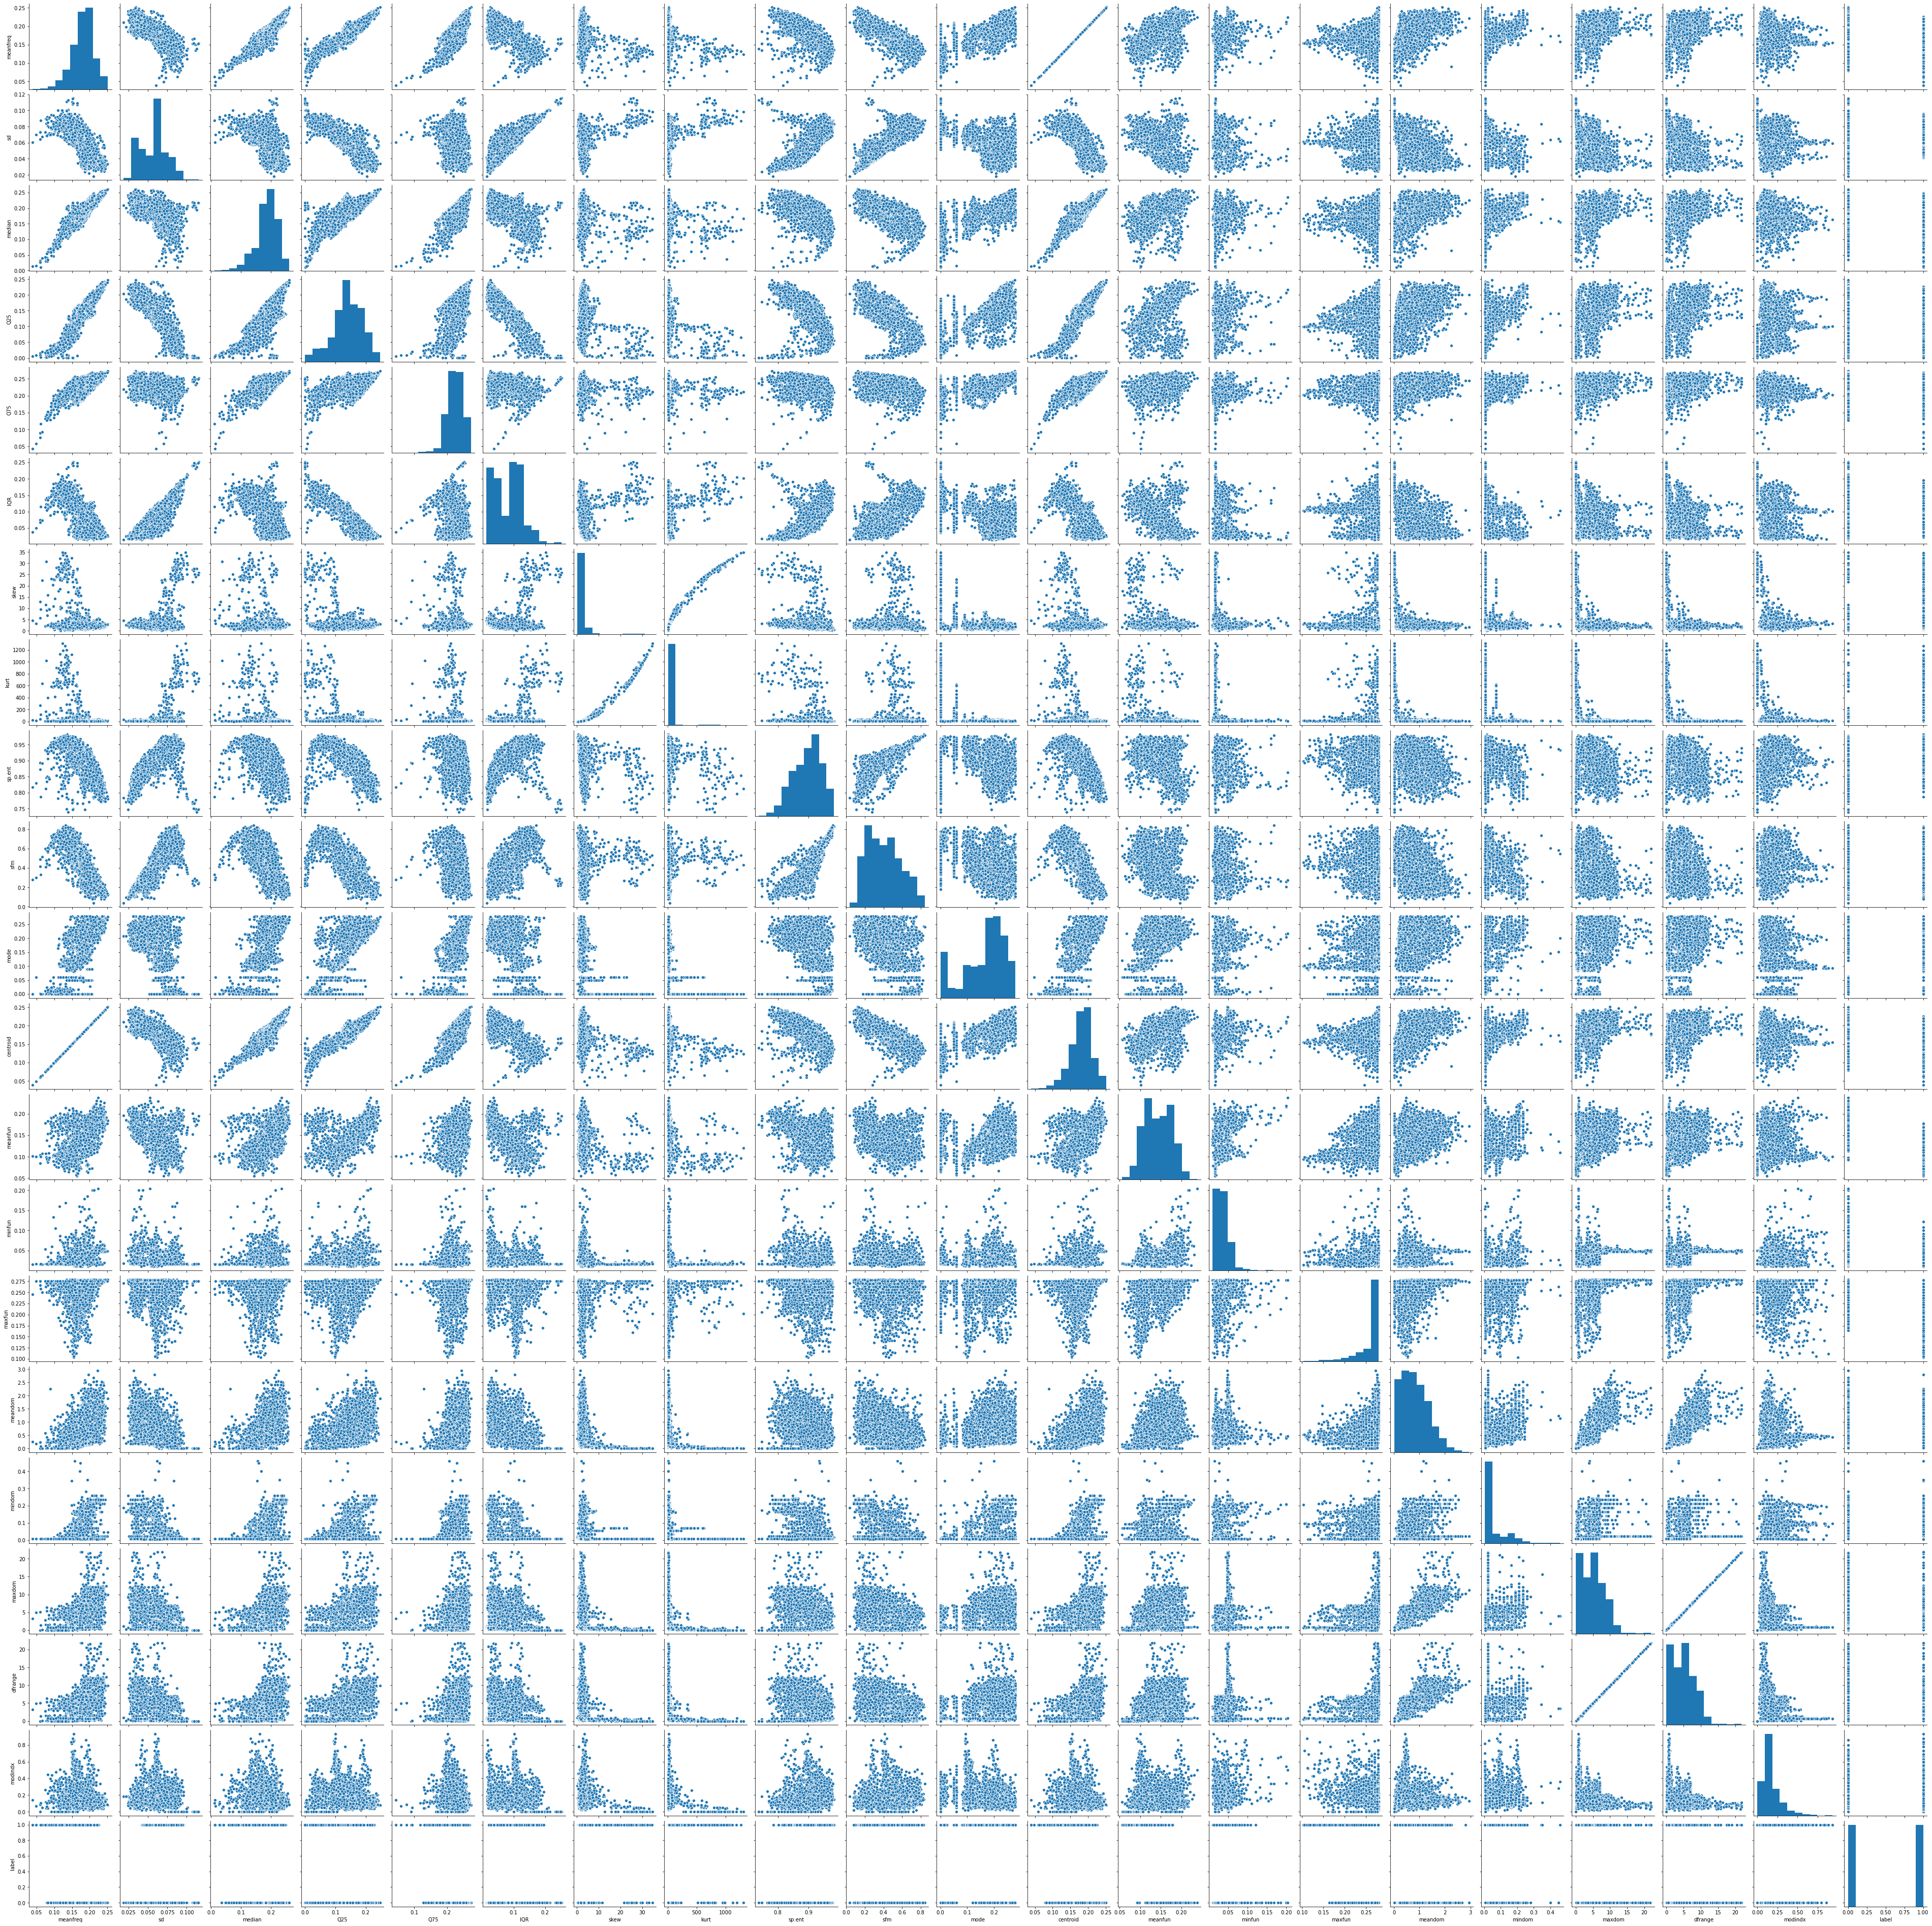

In [36]:
pairplot(df_raw)

<AxesSubplot:>

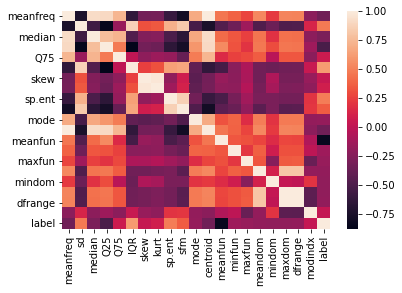

In [41]:
heatmap(df_raw.corr(), )

# cols to remove
> meanfun
> Q25
> centroid
> median
> meanfreq

In [44]:
df_processed = df_raw.drop(['meanfreq', 'median', 'centroid', 'Q25', 'meanfun'], axis=1).copy()

In [54]:
tr_x_pro, te_x_pro, tr_y_pro, te_y_pro = train_test_split(df_raw.drop('label', axis=1), df_raw.label, test_size=0.2)

In [56]:
model_logreg_pro = LogisticRegression()
model_logreg_pro.fit(tr_x_pro, tr_y_pro)
y_pred_pro =  model_logreg.predict(te_x_pro)
accuracy_score(te_y_pro, y_pred_pro)

E:\Edureka_Python-Course\edu-py\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9100946372239748